**Exercício de pré processamento**

*Caso de dados TITANIC*

Realize o pré-processamento de dados para a base Titanic. Crie um arquivo no google colab com
trechos de código que fazem os exercícios solicitados e após envie o arquivo .ipynb. Para tal deve ser utilizada a base disponível no moodle

1. Carregue os dados csv para um dataframe do pandas
2. Faça uma análise dos dados verificando faixa de valores, valores faltantes ou outliers. Gere
gráficos para uma melhor visualização.
3. Faça o Limpeza de dados faltantes. Explore técnicas de remoção das linhas ou substituição por
outro valor. Justifique suas escolhas comentando o código.
4. Faça a remoção das colunas que não impactam para o aprendizado. Justifique.
5. Faça a padronização dos dados numéricos: age, sibsp,parch, fare
6. Faça a transformação dos dados categóricos em numéricos sem criar colunas novas para a coluna
embarked
7. Refaça o exercício 6, agora criando novas colunas para os 3 possíveis valores.

| Atributo  | Definição                                  | Valores                                                                 |
|-----------|---------------------------------------------|------------------------------------------------------------------------|
| survival  | Sobreviveu (sim ou não)                    | 0 = Não, 1 = Sim                                                       |
| pclass    | Classe da passagem                          | 1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe                            |
| sex       | Sexo do passageiro                         | masculino, feminino                                                     |
| age       | Idade em anos                              | valor numérico (idade do passageiro)                                    |
| sibsp     | Nº de irmãos/cônjuges a bordo              | valor numérico                                                          |
| parch     | Nº de pais/filhos a bordo                  | valor numérico                                                          |
| ticket    | Número da passagem                         | código/número                                                           |
| fare      | Preço pago na passagem                     | valor numérico (tarifa)                                                 |
| cabin     | Número da cabine                           | código/número                                                           |
| embarked  | Porto onde embarcou                        | C = Cherbourg, Q = Queenstown, S = Southampton                          |


# 1. CARREGAR OS DADOS DO ARQUIVO CSV

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Configurar estilo dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Carregar o conjunto de dados
df = pd.read_csv('/content/titanic2.csv')
print("=" * 80)
print("DADOS CARREGADOS COM SUCESSO")
print("=" * 80)
print(f"\nDimensões do dataset: {df.shape[0]} linhas e {df.shape[1]} colunas")
print("\nPrimeiras 5 linhas do dataset:")
print(df.head())

DADOS CARREGADOS COM SUCESSO

Dimensões do dataset: 891 linhas e 12 colunas

Primeiras 5 linhas do dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


# 2. ANÁLISE EXPLORATÓRIA DOS DADOS

In [ ]:
print("\n" + "=" * 80)
print("ANÁLISE EXPLORATÓRIA DOS DADOS")
print("=" * 80)

# 2.1 Informações gerais sobre o dataset
print("\n--- Informações Gerais do Dataset ---")
print(df.info())


ANÁLISE EXPLORATÓRIA DOS DADOS

--- Informações Gerais do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# 2.2 Estatísticas descritivas
print("\n--- Estatísticas Descritivas ---")
print(df.describe())


--- Estatísticas Descritivas ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# 2.3 Verificar valores faltantes
print("\n--- Valores Faltantes por Coluna ---")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Coluna': missing_values.index,
    'Valores Faltantes': missing_values.values,
    'Percentual (%)': missing_percent.values
})
print(missing_df[missing_df['Valores Faltantes'] > 0])


--- Valores Faltantes por Coluna ---
      Coluna  Valores Faltantes  Percentual (%)
5        Age                177       19.865320
10     Cabin                687       77.104377
11  Embarked                  2        0.224467


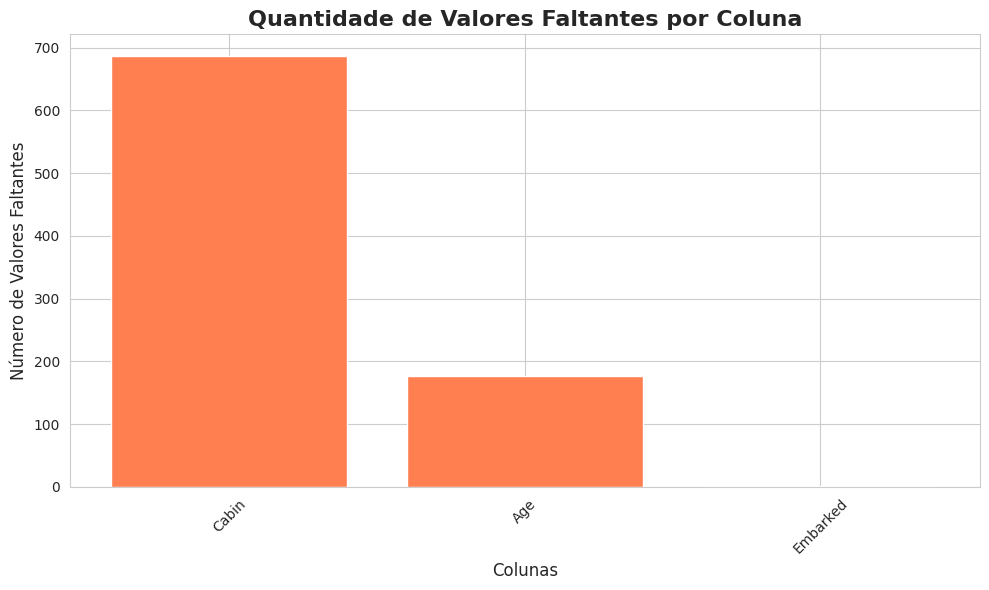

In [ ]:
# 2.4 Visualização de valores faltantes
plt.figure(figsize=(10, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
plt.bar(missing_data.index, missing_data.values, color='coral')
plt.title('Quantidade de Valores Faltantes por Coluna', fontsize=16, fontweight='bold')
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Número de Valores Faltantes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

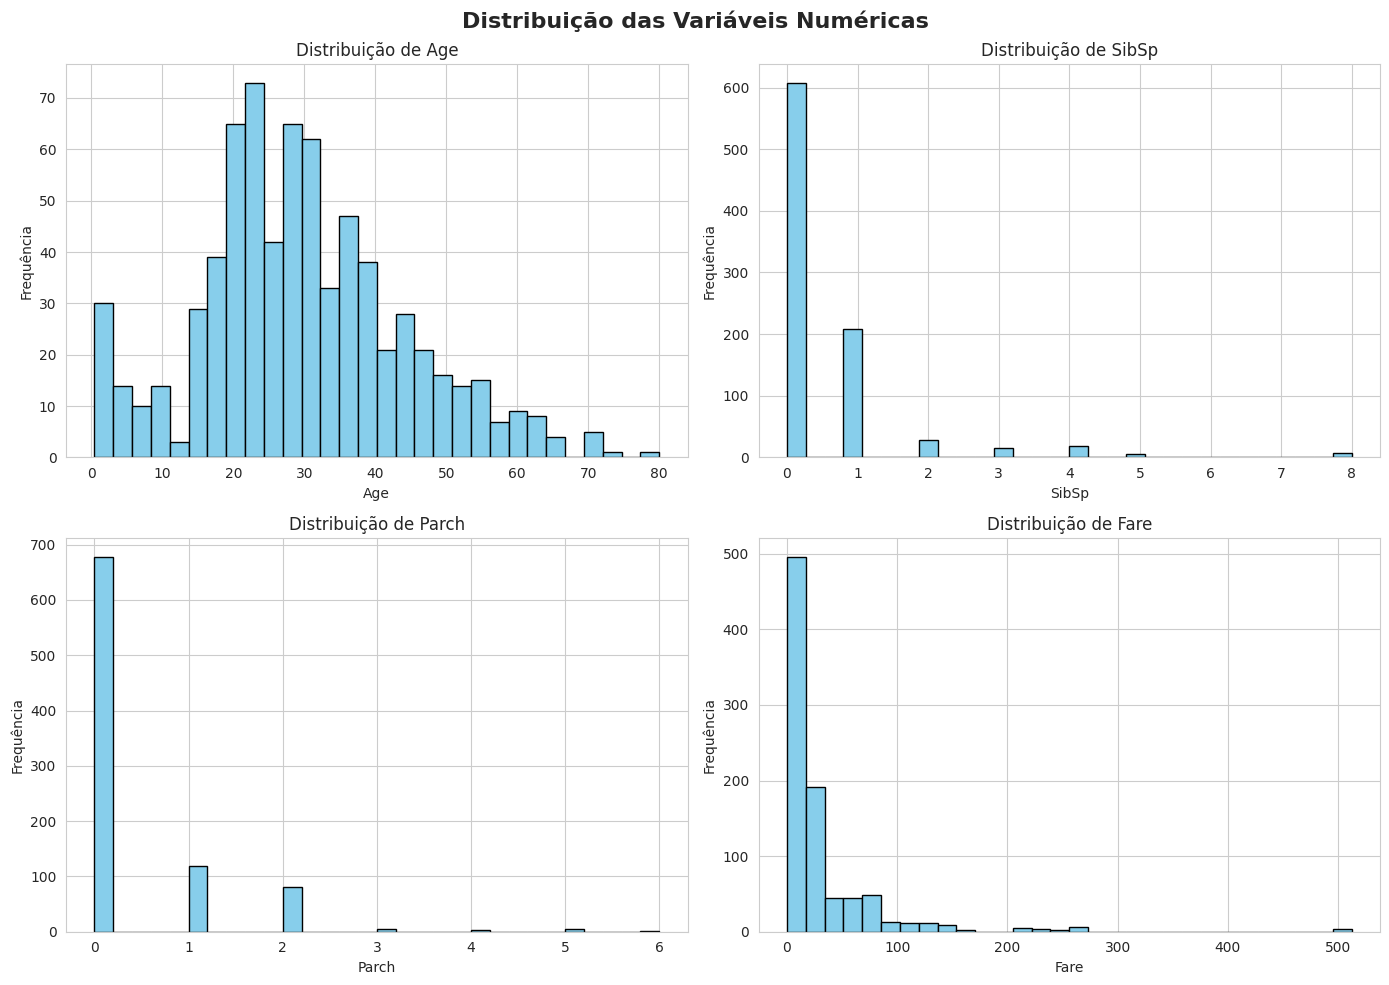

In [ ]:
# 2.5 Distribuição das variáveis numéricas
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16, fontweight='bold')

for idx, col in enumerate(numeric_cols):
    row = idx // 2
    col_idx = idx % 2
    axes[row, col_idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[row, col_idx].set_title(f'Distribuição de {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

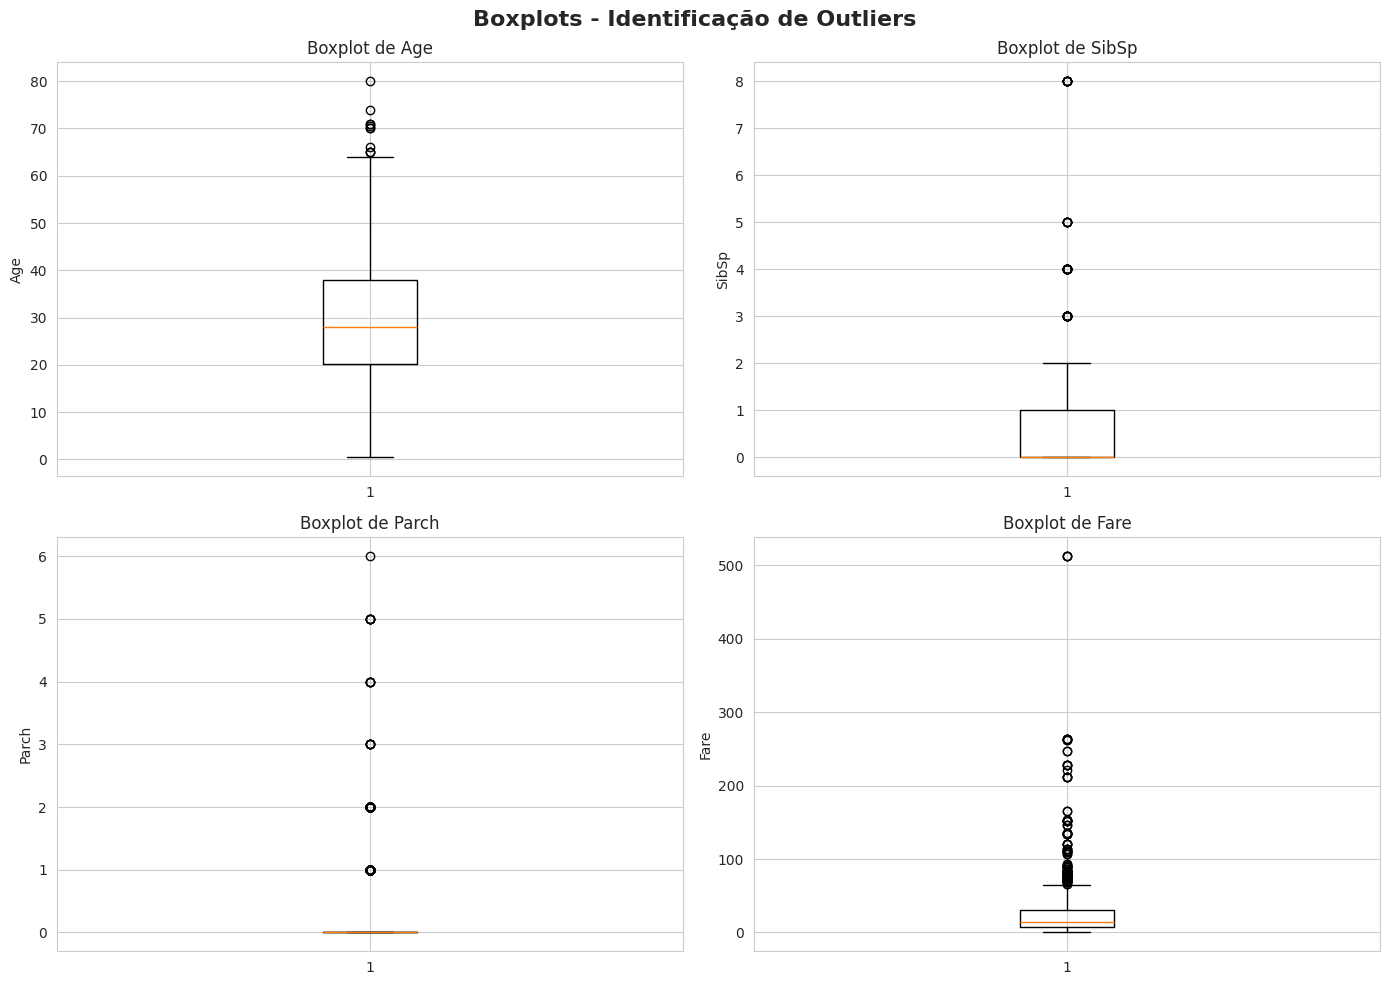

In [ ]:
# 2.6 Boxplots para identificar outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Boxplots - Identificação de Outliers', fontsize=16, fontweight='bold')

for idx, col in enumerate(numeric_cols):
    row = idx // 2
    col_idx = idx % 2
    axes[row, col_idx].boxplot(df[col].dropna(), vert=True)
    axes[row, col_idx].set_title(f'Boxplot de {col}')
    axes[row, col_idx].set_ylabel(col)

plt.tight_layout()
plt.show()


--- Análise de Sobrevivência ---
Taxa de sobrevivência: 38.38%

Distribuição de sobreviventes:
Survived
0    549
1    342
Name: count, dtype: int64


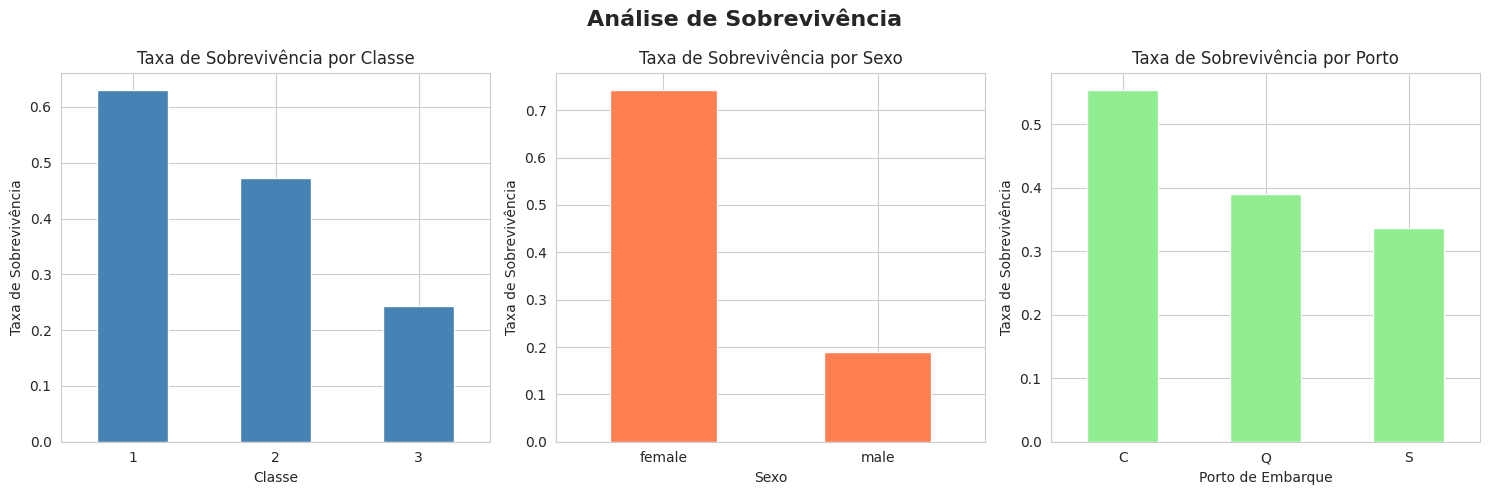

In [ ]:
# 2.7 Análise de sobrevivência
print("\n--- Análise de Sobrevivência ---")
print(f"Taxa de sobrevivência: {df['Survived'].mean():.2%}")
print(f"\nDistribuição de sobreviventes:")
print(df['Survived'].value_counts())

# Gráfico de sobrevivência
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Análise de Sobrevivência', fontsize=16, fontweight='bold')

# Por classe
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Taxa de Sobrevivência por Classe')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Taxa de Sobrevivência')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Por sexo
df.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Taxa de Sobrevivência por Sexo')
axes[1].set_xlabel('Sexo')
axes[1].set_ylabel('Taxa de Sobrevivência')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# Por porto de embarque
df.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Taxa de Sobrevivência por Porto')
axes[2].set_xlabel('Porto de Embarque')
axes[2].set_ylabel('Taxa de Sobrevivência')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# 3. LIMPEZA DE DADOS FALTANTES

In [ ]:
print("\n" + "=" * 80)
print("LIMPEZA DE DADOS FALTANTES")
print("=" * 80)

# Criar uma cópia do dataframe para trabalhar
df_clean = df.copy()

# 3.1 Tratamento da coluna 'Age'
# Justificativa: A idade é uma variável importante para prever sobrevivência.
# Vamos preencher os valores faltantes com a mediana da idade, pois a mediana
# é menos sensível a outliers do que a média.
print("\n--- Tratamento da coluna 'Age' ---")
print(f"Valores faltantes antes: {df_clean['Age'].isnull().sum()}")
age_median = df_clean['Age'].median()
df_clean['Age'].fillna(age_median, inplace=True)
print(f"Valores faltantes após preenchimento com mediana ({age_median:.1f}): {df_clean['Age'].isnull().sum()}")

# 3.2 Tratamento da coluna 'Embarked'
# Justificativa: Apenas 2 valores faltantes. Vamos preencher com a moda (valor mais frequente)
# pois é uma variável categórica.
print("\n--- Tratamento da coluna 'Embarked' ---")
print(f"Valores faltantes antes: {df_clean['Embarked'].isnull().sum()}")
embarked_mode = df_clean['Embarked'].mode()[0]
df_clean['Embarked'].fillna(embarked_mode, inplace=True)
print(f"Valores faltantes após preenchimento com moda ('{embarked_mode}'): {df_clean['Embarked'].isnull().sum()}")

# 3.3 Tratamento da coluna 'Cabin'
# Justificativa: A coluna 'Cabin' tem 77% de valores faltantes. Como a maioria dos dados
# está ausente, esta coluna será removida na próxima etapa, pois não é confiável para análise.
print("\n--- Tratamento da coluna 'Cabin' ---")
print(f"Valores faltantes: {df_clean['Cabin'].isnull().sum()} ({(df_clean['Cabin'].isnull().sum()/len(df_clean))*100:.1f}%)")
print("Decisão: Esta coluna será removida na etapa 4 devido ao alto percentual de dados faltantes.")

# 3.4 Tratamento da coluna 'Fare'
# Justificativa: Apenas 1 valor faltante. Vamos preencher com a mediana da tarifa.
print("\n--- Tratamento da coluna 'Fare' ---")
print(f"Valores faltantes antes: {df_clean['Fare'].isnull().sum()}")
if df_clean['Fare'].isnull().sum() > 0:
    fare_median = df_clean['Fare'].median()
    df_clean['Fare'].fillna(fare_median, inplace=True)
    print(f"Valores faltantes após preenchimento com mediana ({fare_median:.2f}): {df_clean['Fare'].isnull().sum()}")
else:
    print("Nenhum valor faltante encontrado.")

# Verificação final
print("\n--- Resumo Final de Valores Faltantes ---")
print(df_clean.isnull().sum())


LIMPEZA DE DADOS FALTANTES

--- Tratamento da coluna 'Age' ---
Valores faltantes antes: 177
Valores faltantes após preenchimento com mediana (28.0): 0

--- Tratamento da coluna 'Embarked' ---
Valores faltantes antes: 2
Valores faltantes após preenchimento com moda ('S'): 0

--- Tratamento da coluna 'Cabin' ---
Valores faltantes: 687 (77.1%)
Decisão: Esta coluna será removida na etapa 4 devido ao alto percentual de dados faltantes.

--- Tratamento da coluna 'Fare' ---
Valores faltantes antes: 0
Nenhum valor faltante encontrado.

--- Resumo Final de Valores Faltantes ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


/tmp/ipython-input-918001786.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age'].fillna(age_median, inplace=True)
/tmp/ipython-input-918001786.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# 4. REMOÇÃO DE COLUNAS QUE NÃO IMPACTAM O APRENDIZADO

In [ ]:
print("\n" + "=" * 80)
print("REMOÇÃO DE COLUNAS DESNECESSÁRIAS")
print("=" * 80)

print(f"\nColunas antes da remoção: {list(df_clean.columns)}")

# Colunas a serem removidas:
# - 'PassengerId': É apenas um identificador único, não tem valor preditivo
# - 'Name': Nome do passageiro não tem relação direta com sobrevivência
# - 'Ticket': Número do ticket é muito variado e não tem padrão útil
# - 'Cabin': 77% de valores faltantes, dados insuficientes para análise

columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

print("\n--- Justificativas para Remoção ---")
print("1. 'PassengerId': Identificador único sem valor preditivo")
print("2. 'Name': Nome individual não tem correlação com sobrevivência")
print("3. 'Ticket': Códigos de ticket muito variados sem padrão identificável")
print("4. 'Cabin': 77% de valores faltantes, dados insuficientes")

df_clean = df_clean.drop(columns=columns_to_drop)

print(f"\nColunas após a remoção: {list(df_clean.columns)}")
print(f"Dimensões do dataset: {df_clean.shape[0]} linhas e {df_clean.shape[1]} colunas")


REMOÇÃO DE COLUNAS DESNECESSÁRIAS

Colunas antes da remoção: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

--- Justificativas para Remoção ---
1. 'PassengerId': Identificador único sem valor preditivo
2. 'Name': Nome individual não tem correlação com sobrevivência
3. 'Ticket': Códigos de ticket muito variados sem padrão identificável
4. 'Cabin': 77% de valores faltantes, dados insuficientes

Colunas após a remoção: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Dimensões do dataset: 891 linhas e 8 colunas


# 5. PADRONIZAÇÃO DOS DADOS NUMÉRICOS


PADRONIZAÇÃO DOS DADOS NUMÉRICOS

--- Estatísticas ANTES da Padronização ---
              Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000
mean    29.361582    0.523008    0.381594   32.204208
std     13.019697    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     22.000000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     35.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200

--- Estatísticas APÓS a Padronização ---
                Age         SibSp         Parch          Fare
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  4.386066e-17  5.382900e-17  3.987333e-18
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -4.745452e-01 -4.736736e-01 -6.484217e-01
25%   -5.657365e-01 -4.745452e-01 -4.736736e-01 -4.891482e-01
50%   -1.046374e-01 -4

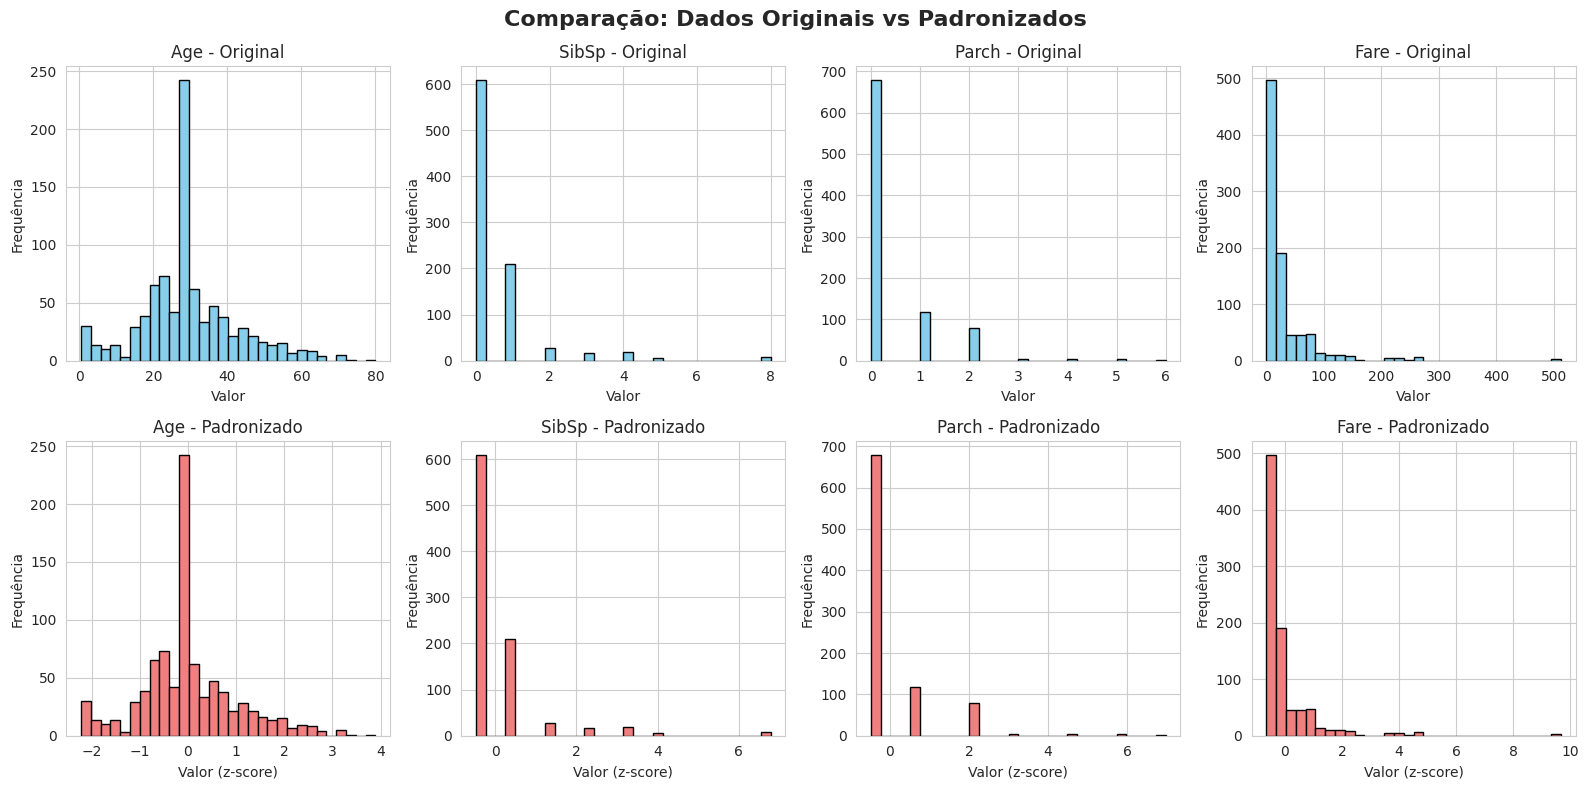

In [ ]:
print("\n" + "=" * 80)
print("PADRONIZAÇÃO DOS DADOS NUMÉRICOS")
print("=" * 80)

# Criar uma cópia para padronização
df_standardized = df_clean.copy()

# Colunas a serem padronizadas
numeric_columns = ['Age', 'SibSp', 'Parch', 'Fare']

print("\n--- Estatísticas ANTES da Padronização ---")
print(df_standardized[numeric_columns].describe())

# Aplicar StandardScaler (z-score normalization)
# Fórmula: z = (x - média) / desvio_padrão
# Resultado: média = 0, desvio padrão = 1
scaler = StandardScaler()
df_standardized[numeric_columns] = scaler.fit_transform(df_standardized[numeric_columns])

print("\n--- Estatísticas APÓS a Padronização ---")
print(df_standardized[numeric_columns].describe())

# Visualização antes e depois
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Comparação: Dados Originais vs Padronizados', fontsize=16, fontweight='bold')

for idx, col in enumerate(numeric_columns):
    # Dados originais
    axes[0, idx].hist(df_clean[col], bins=30, color='skyblue', edgecolor='black')
    axes[0, idx].set_title(f'{col} - Original')
    axes[0, idx].set_xlabel('Valor')
    axes[0, idx].set_ylabel('Frequência')

    # Dados padronizados
    axes[1, idx].hist(df_standardized[col], bins=30, color='lightcoral', edgecolor='black')
    axes[1, idx].set_title(f'{col} - Padronizado')
    axes[1, idx].set_xlabel('Valor (z-score)')
    axes[1, idx].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# 6. TRANSFORMAÇÃO DE DADOS CATEGÓRICOS SEM CRIAR NOVAS COLUNAS

In [ ]:
print("\n" + "=" * 80)
print("TRANSFORMAÇÃO DE DADOS CATEGÓRICOS - LABEL ENCODING")
print("=" * 80)

# Criar uma cópia para label encoding
df_label_encoded = df_standardized.copy()

print("\n--- Transformação da coluna 'Embarked' usando Label Encoding ---")
print("Valores únicos antes da transformação:")
print(df_label_encoded['Embarked'].value_counts())

# Aplicar Label Encoding na coluna 'Embarked'
# Isso atribui um número inteiro único para cada categoria
label_encoder = LabelEncoder()
df_label_encoded['Embarked'] = label_encoder.fit_transform(df_label_encoded['Embarked'])

print("\nMapeamento criado:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"  {label} -> {idx}")

print("\nValores após a transformação:")
print(df_label_encoded['Embarked'].value_counts().sort_index())

# Também vamos transformar a coluna 'Sex' para consistência
print("\n--- Transformação da coluna 'Sex' usando Label Encoding ---")
print("Valores únicos antes da transformação:")
print(df_label_encoded['Sex'].value_counts())

label_encoder_sex = LabelEncoder()
df_label_encoded['Sex'] = label_encoder_sex.fit_transform(df_label_encoded['Sex'])

print("\nMapeamento criado:")
for idx, label in enumerate(label_encoder_sex.classes_):
    print(f"  {label} -> {idx}")

print("\nValores após a transformação:")
print(df_label_encoded['Sex'].value_counts().sort_index())

print("\n--- Dataset com Label Encoding ---")
print(df_label_encoded.head(10))


TRANSFORMAÇÃO DE DADOS CATEGÓRICOS - LABEL ENCODING

--- Transformação da coluna 'Embarked' usando Label Encoding ---
Valores únicos antes da transformação:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Mapeamento criado:
  C -> 0
  Q -> 1
  S -> 2

Valores após a transformação:
Embarked
0    168
1     77
2    646
Name: count, dtype: int64

--- Transformação da coluna 'Sex' usando Label Encoding ---
Valores únicos antes da transformação:
Sex
male      577
female    314
Name: count, dtype: int64

Mapeamento criado:
  female -> 0
  male -> 1

Valores após a transformação:
Sex
0    314
1    577
Name: count, dtype: int64

--- Dataset com Label Encoding ---
   Survived  Pclass  Sex       Age     SibSp     Parch      Fare  Embarked
0         0       3    1 -0.565736  0.432793 -0.473674 -0.502445         2
1         1       1    0  0.663861  0.432793 -0.473674  0.786845         0
2         1       3    0 -0.258337 -0.474545 -0.473674 -0.488854         2
3         1       1  

# 7. TRANSFORMAÇÃO DE DADOS CATEGÓRICOS CRIANDO NOVAS COLUNAS (ONE-HOT ENCODING)

In [ ]:
print("\n" + "=" * 80)
print("TRANSFORMAÇÃO DE DADOS CATEGÓRICOS - ONE-HOT ENCODING")
print("=" * 80)

# Criar uma cópia do dataframe padronizado (antes do label encoding)
df_one_hot = df_standardized.copy()

print("\n--- Transformação da coluna 'Embarked' usando One-Hot Encoding ---")
print(f"Colunas antes: {list(df_one_hot.columns)}")
print(f"Número de colunas: {len(df_one_hot.columns)}")

# Aplicar One-Hot Encoding na coluna 'Embarked'
# Isso cria uma nova coluna binária para cada categoria
# drop_first=False para manter todas as 3 colunas (C, Q, S)
embarked_dummies = pd.get_dummies(df_one_hot['Embarked'], prefix='Embarked', drop_first=False)

print("\nNovas colunas criadas:")
print(embarked_dummies.head(10))

# Remover a coluna original e adicionar as novas colunas
df_one_hot = df_one_hot.drop('Embarked', axis=1)
df_one_hot = pd.concat([df_one_hot, embarked_dummies], axis=1)

print(f"\nColunas após One-Hot Encoding: {list(df_one_hot.columns)}")
print(f"Número de colunas: {len(df_one_hot.columns)}")

# Também aplicar One-Hot Encoding em 'Sex' para consistência
print("\n--- Transformação da coluna 'Sex' usando One-Hot Encoding ---")
sex_dummies = pd.get_dummies(df_one_hot['Sex'], prefix='Sex', drop_first=False)
df_one_hot = df_one_hot.drop('Sex', axis=1)
df_one_hot = pd.concat([df_one_hot, sex_dummies], axis=1)

print(f"\nColunas finais: {list(df_one_hot.columns)}")
print(f"Número de colunas: {len(df_one_hot.columns)}")

print("\n--- Dataset com One-Hot Encoding ---")
print(df_one_hot.head(10))

# Visualização da diferença entre Label Encoding e One-Hot Encoding
print("\n" + "=" * 80)
print("COMPARAÇÃO: LABEL ENCODING vs ONE-HOT ENCODING")
print("=" * 80)

print("\n--- Exemplo com Label Encoding ---")
print("Coluna 'Embarked' transformada em uma única coluna numérica:")
print(df_label_encoded[['Pclass', 'Sex', 'Embarked', 'Survived']].head(10))

print("\n--- Exemplo com One-Hot Encoding ---")
print("Coluna 'Embarked' transformada em 3 colunas binárias:")
print(df_one_hot[['Pclass', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']].head(10))


TRANSFORMAÇÃO DE DADOS CATEGÓRICOS - ONE-HOT ENCODING

--- Transformação da coluna 'Embarked' usando One-Hot Encoding ---
Colunas antes: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Número de colunas: 8

Novas colunas criadas:
   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True
5       False        True       False
6       False       False        True
7       False       False        True
8       False       False        True
9        True       False       False

Colunas após One-Hot Encoding: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
Número de colunas: 10

--- Transformação da coluna 'Sex' usando One-Hot Encoding ---

Colunas finais: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', '

# RESUMO FINAL

In [ ]:
print("\n" + "=" * 80)
print("RESUMO FINAL DO PRÉ-PROCESSAMENTO")
print("=" * 80)

print("\n1. ✓ Dados carregados com sucesso")
print("2. ✓ Análise exploratória realizada (valores faltantes, outliers, distribuições)")
print("3. ✓ Dados faltantes tratados:")
print("   - Age: preenchida com mediana")
print("   - Embarked: preenchida com moda")
print("   - Fare: preenchida com mediana")
print("4. ✓ Colunas removidas: PassengerId, Name, Ticket, Cabin")
print("5. ✓ Dados numéricos padronizados: Age, SibSp, Parch, Fare")
print("6. ✓ Label Encoding aplicado (sem criar novas colunas)")
print("7. ✓ One-Hot Encoding aplicado (criando novas colunas)")

print("\n--- Dimensões Finais dos Datasets ---")
print(f"Dataset com Label Encoding: {df_label_encoded.shape[0]} linhas x {df_label_encoded.shape[1]} colunas")
print(f"Dataset com One-Hot Encoding: {df_one_hot.shape[0]} linhas x {df_one_hot.shape[1]} colunas")

print("\n--- Datasets Prontos para Modelagem ---")
print("df_label_encoded: Dataset com variáveis categóricas codificadas como números")
print("df_one_hot: Dataset com variáveis categóricas expandidas em colunas binárias")

# Salvar os datasets processados (opcional)
# df_label_encoded.to_csv('titanic_label_encoded.csv', index=False)
# df_one_hot.to_csv('titanic_one_hot_encoded.csv', index=False)
# print("\n✓ Datasets salvos com sucesso!")


RESUMO FINAL DO PRÉ-PROCESSAMENTO

1. ✓ Dados carregados com sucesso
2. ✓ Análise exploratória realizada (valores faltantes, outliers, distribuições)
3. ✓ Dados faltantes tratados:
   - Age: preenchida com mediana
   - Embarked: preenchida com moda
   - Fare: preenchida com mediana
4. ✓ Colunas removidas: PassengerId, Name, Ticket, Cabin
5. ✓ Dados numéricos padronizados: Age, SibSp, Parch, Fare
6. ✓ Label Encoding aplicado (sem criar novas colunas)
7. ✓ One-Hot Encoding aplicado (criando novas colunas)

--- Dimensões Finais dos Datasets ---
Dataset com Label Encoding: 891 linhas x 8 colunas
Dataset com One-Hot Encoding: 891 linhas x 11 colunas

--- Datasets Prontos para Modelagem ---
df_label_encoded: Dataset com variáveis categóricas codificadas como números
df_one_hot: Dataset com variáveis categóricas expandidas em colunas binárias
